## ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Pandas for EDA
by [@josephofiowa](https://twitter.com/josephofiowa)
 
<!---
This assignment was developed by Joseph Nelson

Questions? Comments?
1. Log an issue to this repo to alert me of a problem.
2. Suggest an edit yourself by forking this repo, making edits, and submitting a pull request with your changes back to our master branch.
3. Hit me up on Slack @sonylnagale
--->

# Pandas Unit Lab

**Woo!** We've made it to the end of our Pandas Unit. Let's put our skills to the test.

We're going to explore data from some of the top movies according to IMDB. This is a guided question-and-response lab where some areas are specific asks and others are open ended for you to explore.

#### Important!!!
- <font color="red">**There are two ways to do this lab!**</font>
  - The first way is to read in a dataset that _has already been pulled from the API and cleaned for you_ (`movies_rated.csv`). This is the recommended 'first-pass' way to do this lab.
  - _After you have completed the lab using the supplied_ `movies_rated.csv`, you can call the API yourself!
  - Calling the API yourself takes time! Be prepared to parse lots of JSON, read docs, etc. Consider this a take-home exercise if the students desire.

In this lab, we will:
- Use `movie_app.py` to obtain relevant moving rating data
- Leverage Pandas to conduct exploratory data analysis, including:
    - Assess data integrity
    - Create exploratory visualizations
    - Produce insights on top actors/actresses across films
    
Let's get going!

## The Dataset

We'll work with a dataset on the top [IMDB movies](https://www.imdb.com/search/title?count=100&groups=top_1000&sort=user_rating), as rated by IMDB.


Specifically, we have a CSV that contains:
- IMDB star rating
- Movie title
- Year
- Content rating
- Genre
- Duration
- Gross

_[Details available at the above link]_


### Import our necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re
%matplotlib inline

### Read in the dataset

First, read in the dataset, called `movies.csv` into a DataFrame called "movies." It's in the `./data` folder.

In [3]:
movies = pd.read_csv('./movies.csv')

## Check the dataset basics

Let's first explore our dataset to verify we have what we expect.

Print the first five rows.

In [4]:
movies.head()

,title,year,content_rating,genre,duration,gross
0,The Shawshank Redemption,1994,R,Drama,142,1963330
1,The Godfather,1972,R,Crime,175,28341469
2,The Dark Knight,2008,PG-13,Action,152,1344258
3,The Godfather: Part II,1974,R,Crime,202,134966411
4,Pulp Fiction,1994,R,Crime,154,1935047


How many rows and columns are in the datset?

In [5]:
print(movies.shape[0], "rows x ", movies.shape[1], "columns")

79 rows x  6 columns


What are the column names?

In [6]:
movies.columns

Index(['title', 'year', 'content_rating', 'genre', 'duration', 'gross'], dtype='object')

How many unique genres are there?

In [7]:
movies.genre.nunique()

12

How many movies are there per genre?

In [8]:
movies.genre.value_counts()

Crime                  16
Drama                  14
Action                 11
Adventure               9
Drama                   7
Biography               5
Animation               5
Comedy                  4
Western                 3
Mystery                 2
Horror                  2
Comedy                  1
Name: genre, dtype: int64

## Only run the below cells if you've obtained an [API key!](http://www.omdbapi.com/apikey.aspx)<br>Otherwise, proceed to the `importing movies_rated.csv` section below.

### Obtain more data (with an API call)!

- Let's take advantage of our `OmdbAPI` module (stored in `./OmdbAPI.py`, if you'd like to look under the hood) to obtain data from OMDB API on movie ratings. This will enable us to answer the question: **How do other publication's scores compare to IMDB ratings?** Specifically, where do Rotten Tomato critics most disagree with IMDB reviews? 
- Using the OmdbAPI module, we will obtain the `Internet Movie Database`, the `Rotten Tomatoes`, and the `Metacritic` reviews on the top rated IMDB movies. We will store these ratings in new columns in a new `movies_rated` DataFrame. We have also stored the file locally at `./movies_rated.csv`.

In [ ]:
import OmdbAPI

In [ ]:
# replace e54ad9e7 with your API key
# this may take a minute
movies_rated = OmdbAPI.Omdb(movies, 'e54ad9e7').get_ratings()

Just in case there were movies that the API was unable to get, let's drop nulls.

Let's get the ratings in the same float format using an apply function with some regular expressions. Note the use of .copy() when writing and reading from the same dataframe as a best practice.

Finally, let's write the cleaned result to a local file so we don't have to call the API again and risk exceeding our daily limit.

## Importing `movies_rated.csv`

If you just called the API in the previous section, you can skip this and proceed to the `exploratory data analysis` section.

Let's read in the cleaned, rated `movies_rated.csv` file, which was included with this repo just in case you couldn't call the API.

In [9]:
movies_rated = pd.read_csv('./movies_rated.csv')

Check our datatypes. Notice anything potentially problematic?

In [10]:
movies_rated.head()

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic
0,The Shawshank Redemption,1994,R,Drama,142,1963330,9.3,9.1,8.0
1,The Godfather,1972,R,Crime,175,28341469,9.2,9.8,10.0
2,The Dark Knight,2008,PG-13,Action,152,1344258,9.0,9.4,8.2
3,The Godfather: Part II,1974,R,Crime,202,134966411,9.0,9.7,9.0
4,Pulp Fiction,1994,R,Crime,154,1935047,8.9,9.4,9.4


## Exploratory data analysis

Let's transition to asking and answering some questions with our data.

What are the top five R-Rated movies?

*hint: Boolean filters needed! Then sorting!*

In [11]:
movies_rated[movies_rated['content_rating'] == 'R'].sort_values(['Rotten Tomatoes'], ascending=False).head(5)

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic
63,Toy Story,1995,R,Animation,81,83471511,8.3,10.0,9.5
59,Citizen Kane,1941,R,Drama,119,554499,8.4,10.0,10.0
66,Toy Story 3,2010,R,Animation,103,499468,8.3,9.9,9.2
74,L.A. Confidential,1997,R,Crime,138,13182281,8.3,9.9,9.0
64,Taxi Driver,1976,R,Crime,114,936295,8.3,9.8,9.4



What is the average Rotten Tomato score for the top IMDB films?

In [12]:
movies_rated['Rotten Tomatoes'].mean()

9.087341772151895

What is the Five Number Summary like for top rated films as per IMDB? Is it skewed?

In [13]:
movies_rated['Internet Movie Database'].describe()

count    79.000000
mean      8.537975
std       0.222056
min       8.300000
25%       8.400000
50%       8.500000
75%       8.600000
max       9.300000
Name: Internet Movie Database, dtype: float64

The average is *slightly* higher than the median, so there's a small positive skew.

Create your own question...then answer it!

In [18]:
# correlation between star rating and Rotten Tomato rating?

import numpy as np

np.corrcoef(movies_rated['Internet Movie Database'], movies_rated['Rotten Tomatoes'])

array([[1.        , 0.06201485],
       [0.06201485, 1.        ]])

**Challenge:** Create a dataframe that is the ratio between Rotten Tomato rating vs IMDB rating. What film has the highest IMDB : Rotten Tomato ratio? The lowest?

*[skip this if you are low on time]*

In [39]:
movies_rated['ratio'] = movies_rated['Internet Movie Database'] / movies_rated['Rotten Tomatoes']
movies_rated.head()
movies_rated.sort_values(['ratio'], ascending = False).head(1)


,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic,ratio
12,Forrest Gump,1994,PG-13,Drama,142,1401164,8.8,7.2,8.2,1.222222


In [40]:
movies_rated.sort_values(['ratio'], ascending = True).head(1)

,title,year,content_rating,genre,duration,gross,Internet Movie Database,Rotten Tomatoes,Metacritic,ratio
63,Toy Story,1995,R,Animation,81,83471511,8.3,10.0,9.5,0.83


## Exploratory data analysis with visualizations

For each of these prompts, create a plot to visualize the answer. Consider what plot is *most appropriate* to explore the given prompt.


What is the relationship between IMDB ratings and Rotten Tomato ratings?

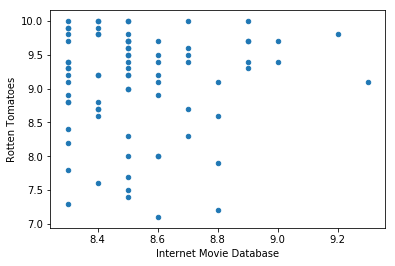

In [41]:
movies_rated.plot(kind = 'scatter', x = 'Internet Movie Database', y = 'Rotten Tomatoes')

What is the relationship between IMDB rating and movie duration?

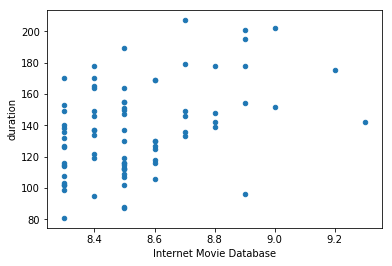

In [42]:
movies_rated.plot(kind = 'scatter', x = 'Internet Movie Database', y = 'duration')

How many movies are there in each genre category? (Remember to create a plot here)

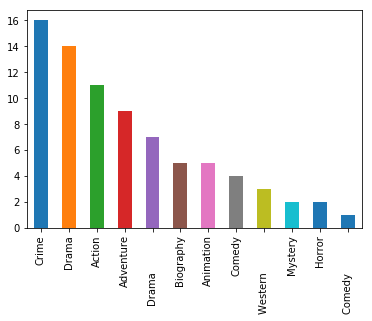

In [45]:
movies_rated['genre'].value_counts().plot(kind = 'bar')

What does the distribution of Rotten Tomatoes ratings look like?

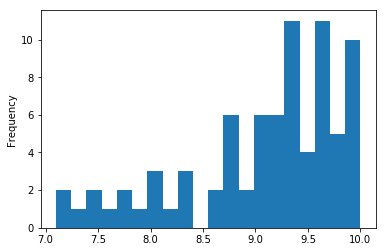

In [46]:
movies_rated['Rotten Tomatoes'].plot(kind = 'hist', bins = 20)

## Bonus

There are many things left unexplored! Consider investigating something about gross revenue and genres.

In [ ]:
# histogram of gross sales

In [ ]:
# top 10 grossing films